In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
import numpy as np
import transformers
from torch.utils.data import Dataset, DataLoader

In [ ]:
train = pd.read_csv("drive/MyDrive/Deep Learning/Project/train.csv")
test = pd.read_csv("drive/MyDrive/Deep Learning/Project/test.csv")

In [ ]:
train['full_text'] = train['full_text'].str.lower()
test['full_text'] = test['full_text'].str.lower()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,i think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,when a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"dear, principal\n\nif u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,the best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [ ]:
test.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,do you think students would benefit from being...
2,00367BB2546B,"thomas jefferson once states that ""it is wonde..."


In [ ]:
scores = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [ ]:
train['full_text'].iloc[20]

"interducaions  :summer vacation should be longer more family time we can do swimming and camping summer brian relaxation, studies cause stress but if we stop after every two months it will divide our follows, are can go on family trips. summer warmest seasons of the year occurring between springs, and autumn. a period considered as a time of fulfillment, happiness, or beauty.  the summer is good seasons for vacation some people fixed holiday where to go for adventure, and traveling. summer is fan,feeling freedom, and enjoble season.  paragraph# 1  students should take longer break if don't take break the brian is can't consecrate and focus and studies might be tried because  students going to school entered of the year human brian is not like machine working as all the time the have to longer break. summer is good opportunity for every one specially to students can go traveling spent time with our family , friends and go to picnic. family is good opportunity to spent time with our kid

In [ ]:
train[scores].iloc[20]

cohesion       3.5
syntax         3.5
vocabulary     3.0
phraseology    3.0
grammar        4.0
conventions    3.0
Name: 0, dtype: float64

In [ ]:
train['full_text']=train['full_text'].str.replace(r'\n', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
num_tokens = train['full_text'].apply(lambda x: x.split()).apply(len)

In [ ]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,i think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,when a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"dear, principal if u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,the best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


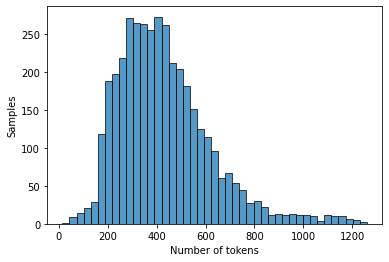

In [ ]:
hist = sns.histplot(data = num_tokens)
hist.set(xlabel = 'Number of tokens', ylabel = 'Samples')
plt.show()

In [ ]:
num_tokens.describe()

count    3911.000000
mean      430.492969
std       191.868449
min        14.000000
25%       294.000000
50%       402.000000
75%       526.500000
max      1260.000000
Name: full_text, dtype: float64

In [ ]:
train[scores].describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
def generate_wordclouds(k = 4.5):
  # Code in this function is inspired from 
  # https://amueller.github.io/word_cloud/auto_examples/single_word.html
  # for generation of word cloud

  fig, ax = plt.subplots(1, 6, figsize=(35,35))

  for i, score in enumerate(scores):
    cloud = WordCloud(background_color = 'black', height = 1000, width = 1000)
    cloud.generate(' '.join(train.full_text[train[score] >= 5]))
    ax[i].imshow(cloud)
    ax[i].set_xlabel(score, fontsize=22)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

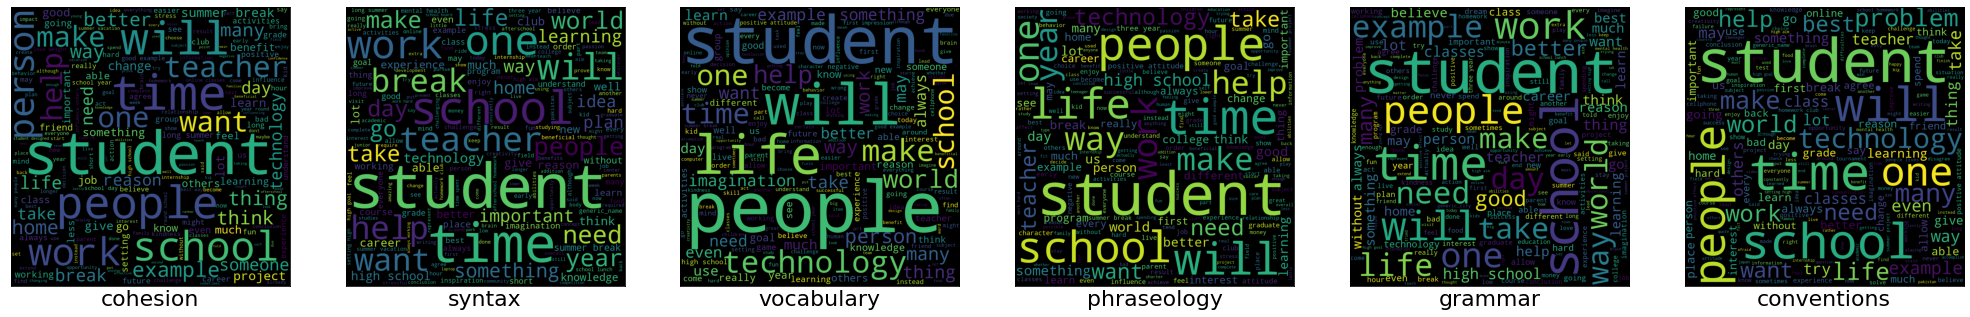

In [ ]:
generate_wordclouds()

In [ ]:
train['total_scores'] = train[scores].sum(axis = 1)

In [ ]:
train['total_scores'].describe()

count    3911.000000
mean       18.621836
std         3.365642
min         6.000000
25%        16.000000
50%        18.500000
75%        21.000000
max        30.000000
Name: total_scores, dtype: float64

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:

class TrainingDataset(Dataset):

  def __init__(self, data):
    self.max_toks = 512
    self.data = data

  def __getitem__(self,idx):

    sentences = self.data['full_text'][idx]
    tokenized_input = tokenizer.encode_plus(sentences, None,  max_length = self.max_toks,
                                             truncation = True, add_special_tokens = True,
                                             padding = 'max_length')
    inputs = {
            "input_ids": torch.tensor(tokenized_input['input_ids'], dtype=torch.long),
            "token_type_ids": torch.tensor(tokenized_input['token_type_ids'], dtype=torch.long),
            "attention_mask": torch.tensor(tokenized_input['attention_mask'], dtype=torch.long)
        }
    
    #tokenized_input['input_ids'] = tokenized_input['input_ids'].squeeze(0)
    label = torch.tensor(self.data.loc[idx, scores].to_list())

    return inputs, label
  
  def __len__(self):
    return len(self.data)
  



In [ ]:
class TestDataset(Dataset):

  def __init__(self, data):
    self.max_toks = 512
    self.data = data

  def __getitem__(self,idx):

    sentences = self.data['full_text'][idx]
    tokenized_input = tokenizer.__call__(sentences, None, max_length = self.max_toks,
                                             truncation = True, add_special_tokens = True,
                                             padding = 'max_length', return_tensors = 'pt')
    
    inputs = {
            "input_ids": torch.tensor(tokenized_input['input_ids'], dtype=torch.long),
            "token_type_ids": torch.tensor(tokenized_input['token_type_ids'], dtype=torch.long),
            "attention_mask": torch.tensor(tokenized_input['attention_mask'], dtype=torch.long)
        }
    
    

    return inputs
  
  def __len__(self):
    return len(self.data)

In [ ]:
tr, va = train_test_split(train, test_size = 0.2, shuffle = True)

In [ ]:
tr = tr.reset_index(drop = True)
va = va.reset_index()
test = test.reset_index()

In [ ]:
train_dataset = TrainingDataset(tr)
validation_dataset = TrainingDataset(va)
test_dataset = TestDataset(test)

In [ ]:
def mcrmse_loss(output, target):

  return torch.mean(torch.sqrt(torch.mean(torch.square(output - target), dim = 0)))

In [ ]:
class BERTModel(nn.Module):
  
  def __init__(self):
    super(BERTModel, self).__init__()

    self.bertencoder = BertModel.from_pretrained("bert-base-uncased")
    self.fc = nn.Linear(768, 6)
  
  def forward(self, x):

    h, output = self.bertencoder(**x, return_dict = False)
    output = self.fc(output)

    return output


In [ ]:
model = BERTModel().to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
learning_rate = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
batch_size = 32
epochs = 6


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
validation_dataloader = DataLoader(validation_dataset, batch_size = batch_size, shuffle = True)

In [ ]:

def train_model(model):

  loss_history = {'train_loss':[],'val_loss':[]}

  for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    model.train()
    train_loss = []
    valid_loss = []

    for samples, labels in train_dataloader:
      
      #samples = samples.to(device)
      samples = {k:samples[k].to(device) for k in samples.keys()}
      labels = labels.to(device)
      #print(samples)
      #samples['input_ids'] = samples['input_ids']
      #print(samples['input_ids'].shape)
      output = model(samples)

      loss = mcrmse_loss(output, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss.append(loss.detach().cpu().numpy())
    
    model.eval()

    with torch.no_grad():
      for samples, labels in validation_dataloader:
        
        #samples = samples.to(device)
        samples = {k:samples[k].to(device) for k in samples.keys()}
        labels = labels.to(device)
        
        output = model(samples)

        loss = mcrmse_loss(output, labels)

        valid_loss.append(loss.detach().cpu().numpy())


    loss_history['train_loss'].append(np.mean(train_loss))
    loss_history['val_loss'].append(np.mean(valid_loss))
    
  
    print('\ntrain loss {:.3f} \t val loss {:.3f}'.format(np.mean(train_loss), np.mean(valid_loss)))
  
  return loss_history

In [ ]:
model_losses = train_model(model)

Epoch 1/6

train loss 1.608 	 val loss 0.679
Epoch 2/6

train loss 0.610 	 val loss 0.619
Epoch 3/6

train loss 0.516 	 val loss 0.505
Epoch 4/6

train loss 0.487 	 val loss 0.548
Epoch 5/6

train loss 0.466 	 val loss 0.513
Epoch 6/6

train loss 0.455 	 val loss 0.546


In [ ]:
#train_dataset[0][0]['input_ids'].shape

In [ ]:
#torch.cuda.empty_cache()

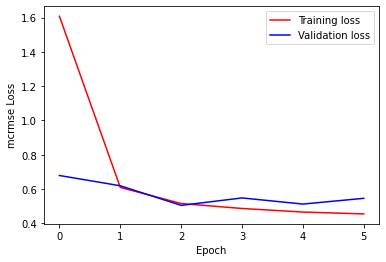

In [ ]:
plt.plot(model_losses['train_loss'], color = 'red')
plt.plot(model_losses['val_loss'], color = 'blue')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epoch')
plt.ylabel('mcrmse Loss')
plt.show()